# 1. Tensor basic

In [166]:
import torch 

## Operation

In [ ]:
x = torch.empty(1)
x

In [ ]:
x = 2 * torch.ones(1, 10)
x

In [ ]:
y = torch.ones_like(x)
y

In [ ]:
y.add(x)
print(y)

In [ ]:
y.add_(x)
print(y)

In [ ]:
y.view(2, 5)

## Numpy and pytorch

In [173]:
import torch
import numpy as np

In [ ]:
a = torch.ones(5)
print(type(a))

b = a.numpy()
print(type(b))

In [ ]:
# Memory address of the tensor data: .data_ptr()
# Memory address of the numpy data: .ctypes.data

a.data_ptr() == b.ctypes.data

## Pytorch / Numpy device

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(True)
else:
    device = torch.device('cpu')
    print(False)

In [ ]:
a = torch.ones(5, device= device)
a.to('cpu')
type(a)

In [ ]:
b = a.numpy()
type(b)

# 2. Gradient auto 

## Gradient calculation

In [ ]:
x = torch.ones(3, requires_grad= True)
print(x)

In [180]:
y = x + 2

In [ ]:
print(y)

### With scalar

In [ ]:
z = y*y*2
z = z.mean()
print(z)

In [183]:
z.backward() # dz/dx

In [ ]:
x.grad

### With vector

In [ ]:
x = torch.ones(3, requires_grad= True)
y = x + 2

f = y*y*2
# vector = torch.tensor([0.1, 0.01, 0.001])
vector = torch.ones(3)
print(f)

In [186]:
f.backward(vector) # df/fx

In [ ]:
x.grad

## Preventing gradient history

In [188]:
x = torch.ones(3, requires_grad= True)
# x.requires_grad_(False)
# x.detach() # create new tensor 

In [ ]:
with torch.no_grad():
    y = x + 2
    print(y)

## Note: gradient for tensor which has required grad will be accumulated  

In [ ]:
weights = torch.ones(4, requires_grad= True)
for epoch in range(1):
    model_output = (weights*3).sum()
    model_output.backward()

    print(weights.grad)

In [ ]:
weights = torch.ones(4, requires_grad= True)
for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()

    print(weights.grad)

In [ ]:
# fix grad to not accumulate

weights = torch.ones(4, requires_grad= True)
for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)
    weights.grad.zero_()

In [193]:
# with optimizer

# optimizer = torch.optim.SGD(params= weights, lr= 0.01)
# optimizer.step()
# optimizer.zero_grad()

# 3. Backpropagation 

The chain rules:
$$
y = f(x), \quad z = g(y)
$$
$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \cdot \frac{\partial y}{\partial x}
$$




Example:
$$
\hat{y} = wx
$$

$$
s = \hat{y} - y
$$

$$
\text{Loss} = (s)^2
$$

$$
\frac{\partial \text{Loss}}{\partial w} = \frac{\partial \text{Loss}}{\partial s} \cdot \frac{\partial s}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w} = 2(wx-y)x
$$


In [194]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad= True)

In [ ]:
y_hat = w*x 
loss = (y_hat - y)**2
loss

In [ ]:
loss.backward()
w.grad

# 4.Gradient Descent with Autograd and Backpropagation

##  Numpy

In [197]:
import numpy as np

In [ ]:
import numpy as np

# Input data
X = np.array([1, 2, 3, 4], dtype=np.float64)
y = np.array([1, 4, 2, 1], dtype=np.float64)

# Initialize weight to zero
w = 0.0 

# Model prediction
def forward(x):
    return w * x

# Loss function (MSE)
def loss(y, y_pred):
    return ((y - y_pred)**2).mean()

# Gradient calculation
# dL/dw = -2/N * sum(x * (y - y_pred))
def gradient(x, y, y_pred):
    return np.dot(2*x, y-y_pred).mean()

print(f'Prediction before training f(5) = {forward(5):.3f}')

# Training parameters
learning_rate = 0.001
n_iter = 10

# Training loop
for epoch in range(n_iter):
    # Predictions
    y_pred = forward(X)

    # Compute loss
    l = loss(y, y_pred)

    # Compute gradient
    dL_dw = gradient(X, y, y_pred)

    # Update weights
    w -= learning_rate * dL_dw

    # Print progress
    if (epoch + 1 % 100) == 0:
        print(f'Epoch: {epoch + 1}, w = {w:.3f}, loss = {l:.3f}')

# Prediction after training
print(f'Prediction after training f(5) = {forward(5):.3f}')

## Pytorch

In [199]:
import torch 

In [ ]:
# f = w * x

X = torch.tensor([1, 2, 3, 4], dtype= torch.float64)
y = torch.tensor([1, 4, 2, 1], dtype= torch.float64)

# W = 0 
w = torch.tensor(0, dtype= torch.float64, requires_grad= True)

# model prediction
def forward(x):
    return w * X

# loss = MSE
def loss(y, y_pred):
    return ((y - y_pred)**2).mean()

# gradient 
# MSE = 1/N * (y - y_pred)**2
# dJ/dw = 1/N * (y - y_pred)**2 * 2w
def gradient(x, y, y_pred):
    return torch.dot(2*x, y - y_pred).mean()

print(f'Prediction before training f(5)= {forward(5)}') 

learning_rate = 1e-6
n_iter = 1000

for epoch in range(n_iter):
    # predic
    y_pred = forward(X)
    l = loss(y, y_pred) 

    l.backward()
    # dL_dw = gradient(X, y, y_pred)

    with torch.no_grad():
        w -= learning_rate*w.grad

    # zero gradient
    w.grad.zero_()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch: {epoch + 1}, w= {w:.3f}, loss= {l:.3f}')

print(f'prediction: {forward(5)}')

# 5. Training Pipeline: Model, Loss, and Optimizer

1. Design model (input, output, forward pass)
2. Construct loss and optimizer
3. Training loop:
    - Forward pass: compute prediction
    - Backward pass: gradients
    - Update weights

In [ ]:
import torch 
import torch.nn as nn

# f = w * x

X = torch.tensor([1, 2, 3, 4], dtype= torch.float64).reshape(4, 1)
y = torch.tensor([1, 4, 2, 1], dtype= torch.float64).reshape(4, 1)
X_test = torch.tensor([10], dtype= torch.float64)

n_samples, n_feature = X.shape

# # W = 0 
# w = torch.tensor(0, dtype= torch.float64, requires_grad= True)

# # model prediction
# def forward(x):
#     return w * X
model = nn.Linear(in_features= n_feature, out_features= n_feature, dtype= torch.float64) # Cácch siêu đơn giản 

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_stack = nn.Linear(
            in_features= input_dim,
            out_features= output_dim,
            dtype= torch.float64
        )

    def forward(self, x):
        return self.linear_stack(x)
    
model = LinearRegression(input_dim= n_feature, output_dim= n_feature)

learning_rate = 1e-6
n_iter = 1

# loss = MSE
# def loss(y, y_pred):
#     return ((y - y_pred)**2).mean()
loss = nn.MSELoss()

# optimizer = torch.optim.SGD(params= [w], lr= learning_rate)
optimizer = torch.optim.SGD(params= model.parameters(), lr= learning_rate)

# gradient 
# MSE = 1/N * (y - y_pred)**2
# dJ/dw = 1/N * (y - y_pred)**2 * 2w    
# def gradient(x, y, y_pred):
#     return torch.dot(2*x, y - y_pred).mean()

# Chỗ này cần chỉnh lại vì không còn hàm forward như trước nữa
# Chúng ta đã sử dụng model, nên phần này có thể sửa lại để gọi model(X_test) cho dự đoán
print(f'Prediction before training f(5)= {model(torch.tensor([[5.0]], dtype=torch.float64))}') 

for epoch in range(n_iter):
    # predict
    # y_pred = forward(X)
    y_pred = model(X)

    l = loss(y, y_pred) 

    # dL_dw = gradient(X, y, y_pred)
    l.backward()

    # with torch.no_grad():
    #     w -= learning_rate*w.grad
    optimizer.step()

    # zero gradient
    # w.grad.zero_()
    optimizer.zero_grad()

    # Điều kiện in kết quả chỉ mỗi 1000 epoch
    
    [w, b] = model.parameters()
    print(f'[w, b] = [{w.item()}, {b.item()}]')
    # print(f'Epoch: {epoch + 1}, w= {w.data}, loss= {l.item():.3f}')

# Dự đoán sau khi huấn luyện
print(f'Prediction {model(X_test)}')
# print(f'prediction: {forward(5)}')


### Giải thích từ Chat GPT

Giải thích:
Sử dụng model(X) vs model.forward(X):

Trong PyTorch, bạn luôn nên sử dụng model(X) thay vì gọi trực tiếp model.forward(X). Lý do là PyTorch sử dụng phương thức __call__() bên trong, phương thức này bao gồm nhiều chức năng bổ sung như hooks và đảm bảo hành vi chính xác trong quá trình huấn luyện và đánh giá (chẳng hạn như khi sử dụng dropout hoặc batch normalization).
Bằng cách gọi model(X), PyTorch sẽ tự động gọi model.forward(X) bên trong và xử lý các thao tác bổ sung như hooks và các chế độ (train/eval).
Gọi trực tiếp forward():

Mặc dù có thể dễ dàng gọi trực tiếp forward() bằng cách viết model.forward(X), điều này sẽ bỏ qua các tính năng bổ sung (chẳng hạn như các hooks đã đăng ký hoặc ngữ cảnh torch.no_grad()). Do đó, không khuyến khích việc gọi forward() trực tiếp trừ khi bạn muốn bỏ qua các tính năng bổ sung, điều này hiếm khi cần thiết.

### Test param 
https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#torch.nn.parameter.Parameter

In [ ]:
w


In [ ]:
type(w)

In [ ]:
w[0]


In [ ]:
type(w[0])

In [ ]:
w[0][0]


In [ ]:
type(w[0][0])

In [ ]:
w[0][0].item()


In [ ]:
w.item()

In [ ]:
type(w[0][0].item())

In [ ]:
b

In [ ]:
type(b)

In [ ]:
b[0]

In [ ]:
type(b[0])

In [ ]:
b.item()

# 6. Linear Regression

In [216]:
import torch
import torch.nn as nn
import numpy as np 
from sklearn import datasets
import plotly.graph_objects as go

## Prepare datasets

In [217]:
X_numpy, y_numpy = datasets.make_regression(n_samples= 100, n_features= 1, noise= 20, random_state= 1)

In [218]:
X = torch.from_numpy(X_numpy.astype(np.float64))
y = torch.from_numpy(y_numpy.astype(np.float64))

In [219]:
y = y.view(-1, 1)   

Có, y.view() và y.reshape() trong PyTorch đều được sử dụng để thay đổi hình dạng của một tensor, nhưng chúng khác nhau về cách xử lý bộ nhớ.

Khác biệt chính:
view():

view(): tạo ra một tensor mới với hình dạng mong muốn mà không thay đổi dữ liệu. Tuy nhiên, nó yêu cầu tensor gốc phải có bộ nhớ liên tục (tức là các phần tử được lưu trong một khối liên tục).
Nếu tensor không liên tục, bạn phải gọi tensor.contiguous() trước, để tạo một bản sao của dữ liệu trong bộ nhớ liên tục trước khi áp dụng view().

reshape(): cố gắng trả về một tensor mới với hình dạng mong muốn và có thể trả về một view nếu tensor đã liên tục. Tuy nhiên, nếu tensor không liên tục trong bộ nhớ, reshape() sẽ tự động tạo một bản sao của dữ liệu mà không yêu cầu gọi contiguous().
Điều này làm cho reshape() linh hoạt hơn nhưng có thể kém hiệu quả hơn trong một số trường hợp vì có thể liên quan đến việc sao chép dữ liệu.

## Design 

In [220]:
n_samples, n_feature = X.shape

In [221]:
# model 
input_size = n_feature
model = nn.Linear(in_features= input_size, out_features= 1, dtype= torch.float64)

##  Loss_fn and optimizer

In [222]:
criterion_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.3)

## Training loop


In [ ]:
epochs = 1000
for epoch in range(epochs):
    y_pred = model(X)

    loss = criterion_fn(y_pred, y)

    loss.backward()
    
    optimizer.step()

    optimizer.zero_grad()

    if (epoch + 1) % 100 == 0:
        print(f'Epcoh: {epoch + 1}, loss= {loss.item(): .2f}')

with torch.no_grad():
    predicted = model(X).detach().numpy() 


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= X.reshape(-1,), y= y.reshape(-1,), mode= 'markers'))
fig.add_trace(go.Scatter(x= X.reshape(-1,), y= predicted.reshape(-1,), mode= 'lines'))
fig.show()

# 7. Logistic Regression

In [225]:
import numpy as np

import torch
import torch.nn as nn

import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Prepare datasets

In [226]:
# Load dataset

breast_cancer_dataset = datasets.load_breast_cancer()

In [ ]:
# Infor of dataset

breast_cancer_dataset

In [228]:
X, y = breast_cancer_dataset['data'], breast_cancer_dataset['target']

In [229]:
n_samples, n_feature = X.shape

In [230]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 1, 
                                                     shuffle= True, stratify= y)    

In [231]:
# Scale dataset

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [232]:
# Convert to tensor

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [233]:
y_train.shape # view shape of y_train

y_train = y_train.view(-1 , 1)
y_test = y_test.view(-1, 1)

## Define

In [234]:
class LogisticRegression(nn.Module):
    def __init__(self, X, y):
        super().__init__()
        self.n_samples, self.n_features = X.shape
        self.input = X
        self.output = y
        self.logistic_regression = nn.Sequential(
            nn.Linear(in_features= self.n_features, out_features= 1), # Dễ sai cái này, 30 input - > 0 or 1 nên out = 1
            nn.Sigmoid() 
        )

    def forward(self, x):
        return self.logistic_regression(x)

In [235]:
model = LogisticRegression(X= X_train, y= y_train)

In [ ]:
X_train.shape

## Loss_fn and optimizer

In [237]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(params= model.parameters(), lr= 0.1)

## Training loop

In [ ]:
epochs = 1000
for epoch in range(epochs):
    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if (epoch + 1) % 100 == 0:
        print(f'epoch: {epoch}, loss: {loss.item()}')


In [ ]:
# test
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_test_cls = y_pred_test.round()

    len_y_test = float(y_test.shape[0])
    accuracy = y_pred_test_cls.eq(y_test).sum() / len_y_test
    print(f'accuracy= {accuracy:.4f}')

# 8. Dataset and DataLoader

## Review epoch, batch_size, num_iter

epoch: 1 forward and backward pass of all training samples

batch_size: number of training sample in 1 forward and backward (small samples)

num_iter: num pass, each pass use [batch_size] sample 

ex: 100 sample, batch_size: 20 -> 100/20=5 iter for 1 epoch

In [75]:
import numpy as np
import math

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader


## Prepare dataset

In [76]:
# Path dataset

path_wine_dataset = r'C:\\Users\\hongquan\\Documents\\GitHub\\Deep-Learning\\wine\\wine.csv'

### Create new class to store and handle Dataset

In [77]:
class WineDataset(Dataset):
    def __init__(self, Path_data):
        super().__init__()
        self.data = np.loadtxt(Path_data, delimiter= ',', dtype= np.float32, skiprows= 1) # skip first row

        self.n_sample, self.n_fearture = self.data.shape

        self.X = self.data[:, 1:]
        self.y = self.data[:, 0]    # Chú ý: thay vì dùng cách này có thể xài cách sau mà không 
                                    # cần convert lại bằng reshape(-1, 1)
        # -> Cách 2 hay:
        self.y = self.data[:, [0]]

        # cvt to tensor
        self.X = torch.from_numpy(self.X)
        self.y = torch.from_numpy(self.y)
        
    # Tạo __getiem__ để được gọi tự động khi sử dụng DataLoader
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__ (self):
        return self.n_sample

In [78]:
# Initialize data
wine_dataset = WineDataset(path_wine_dataset)

### Dataloader 

In [79]:
dataloader = DataLoader(dataset= wine_dataset, batch_size= 4, shuffle= True)

In [80]:
data_iter = iter(dataloader)
data = next(data_iter)

In [ ]:
features, labels = data
features, labels

In [82]:
n_sample_iter = dataloader.__len__()
n_iter = math.ceil(n_sample_iter/4)

## Train loop

In [ ]:
epochs = 1000

for epoch in range(epochs):
    for i, (feature, label) in enumerate(dataloader):
        # forward, backward, update
        if (i + 1) % 4 and (epoch + 1 ) % 200 == 0:
            print(f'Epoch: {epoch + 1}/{epochs}, step: {i+1}/{n_iter}, ...')


# 9. Transform 

In [84]:
# On Images
# ---------
# CenterCrop, Grayscale, Pad, RandomAffine
# RandomCrop, RandomHorizontalFlip, RandomRotation
# Resize, Scale

# On Tensors
# ----------
# LinearTransformation, Normalize, RandomErasing

# Conversion
# ----------
# ToPILImage: from tensor or ndrarray
# ToTensor : from numpy.ndarray or PILImage

# Generic
# -------
# Use Lambda 

# Custom
# ------
# Write own class

# Compose multiple Transforms
# ---------------------------
# composed = transforms.Compose([Rescale(256), RandomCrop(224)])


## Prepare and define 

In [85]:
path_wine_dataset = r'C:\\Users\\hongquan\\Documents\\GitHub\\Deep-Learning\\wine\\wine.csv'

class WineDataset(Dataset):
    def __init__(self, transform= None, Path_data= ''):
        super().__init__()
        self.data = np.loadtxt(Path_data, delimiter= ',', dtype= np.float32, skiprows= 1) # skip first row
        self.transform = transform
        self.n_sample, self.n_fearture = self.data.shape

        self.X = self.data[:, 1:]
        self.y = self.data[:, 0]    # Chú ý: thay vì dùng cách này có thể xài cách sau mà không 
                                    # cần convert lại bằng reshape(-1, 1)
        # -> Cách 2 hay:
        self.y = self.data[:, [0]]
        
    # Tạo __getiem__ để được gọi tự động khi sử dụng DataLoader
    def __getitem__(self, index):
        sample = self.X[index], self.y[index]
        if self.transform:
            sample = self.transform(sample) 
        return sample
    
    def __len__ (self):
        return self.n_sample

## Class transforms

In [86]:
class ToTensor:
    def __call__(self, sample):
        input, target = sample
        return torch.from_numpy(input), torch.from_numpy(target)

In [87]:
class MulTransform:
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        input, target = sample
        return input*self.factor, target

In [88]:
# Init dataset
wine_dataset_not_trans = WineDataset(None, path_wine_dataset)

wine_dataset_trans = WineDataset(ToTensor(), path_wine_dataset)

In [ ]:
test_ = wine_dataset_not_trans[1]
test_

In [ ]:
test_ = wine_dataset_trans[1]
test_

## Compose transform

In [91]:
composed = torchvision.transforms.Compose(
    [ToTensor(),
    MulTransform(2)]
)

In [92]:
dataset_composed = WineDataset(composed, path_wine_dataset)

In [ ]:
test_ = dataset_composed[1]
test_

In [ ]:
test_ = wine_dataset_trans[1]
test_

# 10. Softmax and Cross Entropy 

## Softmax

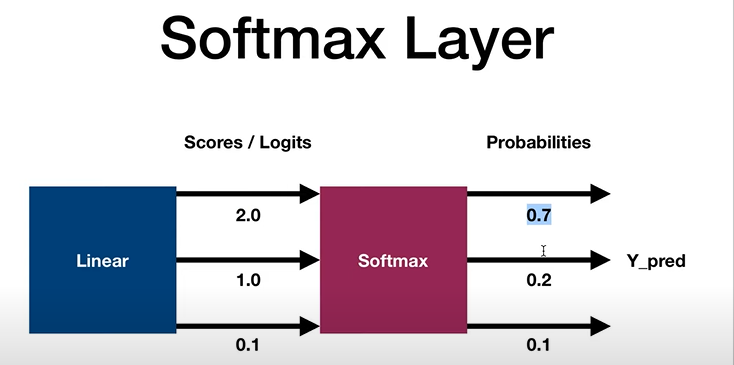

In [ ]:
# numpy 
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis= 0)

x = np.array([2.0 , 1.0, 0.1])
y_pred = softmax(x)
y_pred

In [ ]:
# torch 
x = torch.tensor([2.0, 1.0, 0.1])
y_pred = torch.softmax(x, dim= 0)
y_pred

## Cross entropy

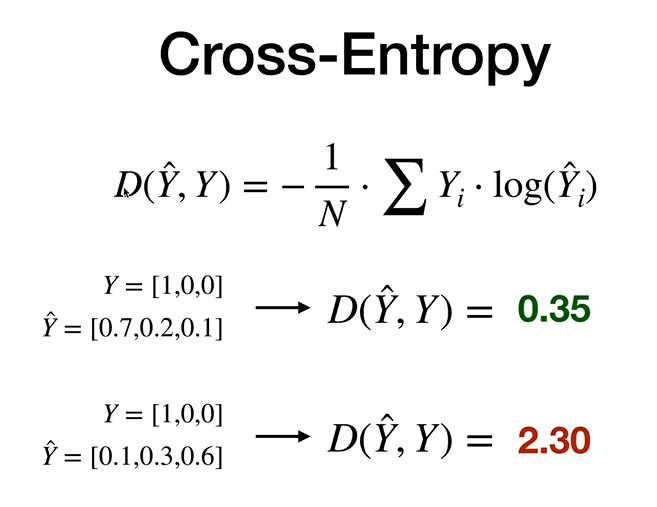

In [97]:
# numpy 

def cross_entropy(actual, predicted, n_samples):
    return (-1/n_samples) * np.sum(actual * np.log(predicted), axis= 0)

# y must be one hot encoded
y = np.array([1.0, 0, 0])

y_pre_good = np.array([0.7, 0.2, 0.1])
y_pre_bad = np.array([0.1, 0.2, 0.7])

In [ ]:
loss_good = cross_entropy(y, y_pre_good, 1)
loss_bad = cross_entropy(y, y_pre_bad, 1)
print(loss_good)
print(loss_bad)

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

The input is expected to contain the unnormalized logits for each class
->nn.CrossEntropyLoss = nn.LogSoftmax + nn.NLLLoss 

y has class label | must not one hot 

y_pred has raw scores | must not softmax

In [99]:
# torch 
loss = nn.CrossEntropyLoss()

y = torch.tensor([0])

# [n_samples * n_class] = [1 * 3]
y_pre_good = torch.tensor([[2.0, 1.0, 0.1]])
y_pre_bad = torch.tensor([[0.1, 1.0, 2.0]])

In [ ]:
# calculate loss

loss_good = loss(y_pre_good, y)
loss_bad = loss(y_pre_bad, y)
print(loss_good.item())
print(loss_bad.item())

In [ ]:
# get value and index of y_pred / predict

_, prediction_1 = torch.max(y_pre_good, 1)
_, prediction_2 = torch.max(y_pre_bad, 1)
print(prediction_1)
print(prediction_2)

# 11. Activation function

$$
f(x) = 
\begin{cases}
1, & \text{if } x \ge \text{threshold} \\
0, & \text{if } x < \text{threshold}
\end{cases}
$$

## Sigmoid function

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$


## TanH function

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$


## ReLU function

$$
\text{ReLU}(x) = 
\begin{cases}
x, & \text{if } x \ge 0 \\
0, & \text{if } x < 0
\end{cases}
$$

## Leaky ReLU function

$$
\text{Leaky ReLU}(x) = 
\begin{cases}
x, & \text{if } x \ge 0 \\
\alpha x, & \text{if } x < 0
\end{cases}
$$



## Softmax

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}
$$


## Ứng dụng 

nn.Sigmoid = torch.sigmoid
$$ \\ $$
nn.Softmax = torch.softmax
$$ \\ $$
nn.Tanh = torch.tanh

# 12. Feed-forward Neural Network

In [102]:
# choose device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [103]:
# config hyper param
input_size = 28*28 
hidden_size = 100
num_classes = 10 
epochs = 200
batch_size = 100
learning_rate = 0.001

In [104]:
# give path of mnist
path_mnist_test = r'C:\\Users\hongquan\\Documents\\GitHub\\Deep-Learning\\mnist\\mnist_test.csv'
path_mnist_train = r'C:\\Users\hongquan\\Documents\\GitHub\\Deep-Learning\\mnist\\mnist_train.csv'

In [105]:
# load dataset
class Dataset:
    def __init__(self, transform= None, path= ''):
        self.path = path
        self.transform = transform

        self.dataset = np.loadtxt(path, delimiter= ',', skiprows= 0)

        self.input = self.dataset[:, 1:]
        self.target = self.dataset[:, [0]]
    
    def __getitem__(self, index):
        self.sample = self.input[index], self.target[index]

        if self.transform:
            self.sample = self.transform(self.sample)

        return self.sample
    
    def __len__(self):
        return len(self.dataset)
    
class Transfrom:
    def __call__(self, sample):
        input, target = sample
        return torch.from_numpy(input), torch.from_numpy(target) 

In [106]:
# mnsit dataset
train_mnist = Dataset(path= path_mnist_train, transform= Transfrom()) 

test_mnist = Dataset(path= path_mnist_test, transform= Transfrom()) 

In [107]:
# load dataset
load_train_mnist = DataLoader(dataset= train_mnist, batch_size= batch_size, shuffle= True)

load_test_mnist = DataLoader(dataset= test_mnist, batch_size= batch_size, shuffle= True)

In [108]:
# Define class Neural Network

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.neuron_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        return self.neuron_stack(x)

In [109]:
# create nn model
model = NeuralNetwork(input_size= 28*28, hidden_size= 100, num_classes= 10)

In [110]:
# loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

In [ ]:
# training loop
n_total_step = len(load_train_mnist)
for epoch in range(epochs):
    for i, (X, y) in enumerate(load_train_mnist):
        # move to cuda / cpu
        X = X.to(device).float()
        y = y.to(device).long().squeeze()

        # predict value
        y_pred = model(X)

        # calculate cost
        loss = loss_fn(y_pred, y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    
        if (epoch + 1) % 100 == 0 and (i + 1) % 20 == 0:
            print(f'Epoch: {epoch + 1}/{epochs}, step: {i+1}/{n_total_step}, loss: {loss.item()}')

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    i = 0
    for images, label in load_test_mnist:
        # Move to the appropriate device and convert to float
        images = images.to(device).float()
        labels = label.to(device).long()  # Convert labels to long for comparison

        # Forward pass
        output = model(images)
        _, prediction = torch.max(output, 1)  # Get the predicted class

        # Update the count of correct predictions and total samples
        n_samples += labels.shape[0]
        n_correct += (prediction == labels.reshape(-1,)).sum().item()

        # Print predicted and actual labels for debugging
        # print(prediction)
        # print(labels)

    # Calculate accuracy
    accuracy = 100.0 * n_correct / n_samples
    print(f'Accuracy: {accuracy:.2f}%')
    

# 13. Convolutional Neural Networks

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as functionnal
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

import plotly.graph_objects as go

In [2]:
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# number hyper parameter 
epochs = 1000
batch_size = 100
learning_rate = 0.001

In [4]:
# transform config
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean= [0.5, 0.5, 0.5], std= [0.5, 0.5, 0.5])
])

In [5]:
# Dataset CIFAR-10 
train_dataset = torchvision.datasets.CIFAR10(root= r'C:\Users\hongquan\Documents\GitHub\Deep-Learning\cifar-10', train= True,
                                             transform= transforms, download= False)

test_dataset = torchvision.datasets.CIFAR10(root= r'C:\Users\hongquan\Documents\GitHub\Deep-Learning\cifar-10', train= False,
                                             transform= transforms, download= False)

In [6]:
train_loader = DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle= True)
test_loader = DataLoader(dataset= test_dataset, batch_size= batch_size, shuffle= True)

In [7]:
# define classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
# define conv
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels= 3, out_channels= 6, kernel_size= 5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2, stride= 2), 

            nn.Conv2d(in_channels= 6, out_channels= 16, kernel_size= 5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2, stride= 2),
            
            nn.Flatten(),

            nn.Linear(in_features= 16*5*5, out_features= 120),
            nn.ReLU(),

            nn.Linear(in_features= 120, out_features= 84),
            nn.ReLU(), 

            nn.Linear(in_features= 84, out_features= 10),
            nn.ReLU()
        )

    def forward(self, x):
        return self.conv(x)
    

model = ConvNet().to(device)

In [14]:
# loss_fn and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model.parameters(), lr= learning_rate)

In [ ]:
# train loop

for epoch in range(epochs):
    for i, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)

        y_pred = model(inputs)

        loss = criterion(y_pred, targets)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if (epoch + 1) % 100 == 0 and (i + 1) % 20 == 0:
            print(f'Epoch: {epoch + 1}/{epochs}, step: {i + 1}/{len(train_loader)}, loss: {loss.item()}')

print('Finish')


In [ ]:
with torch.no_grad():
    n_samples = 0
    n_correct = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for (images, labels) in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        output = model(images)

        # get predict
        _, prediction = torch.max(output, 1) 

        n_samples += labels[i]
        n_correct += (prediction == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = prediction[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[labels] += 1

    accuracy = n_correct / n_samples 
    print(accuracy)

    for i in range(10):
        accuracy = n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]} is {accuracy}') 

# 14. Transfer learning

In [1]:
import torch
import torch.nn as nn 

import torch.optim as optim
from torch.optim import lr_scheduler 

import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader

import os
import time 
import copy

import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
# set mean and std 
mean = [0.5, 0.5, 0.5]
std = [0.25, 0.25, 0.25]

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [62]:
# transform
data_transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean= mean, std= std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean= mean, std= std)
    ])
}

In [63]:
data_dir = r'C:\Users\hongquan\Documents\GitHub\Deep-Learning\hymenoptera_data'

# load data set
image_dataset = {x: datasets.ImageFolder(root= os.path.join(data_dir, x), 
                                         transform= data_transform[x])
                 for x in ['train', 'val']}

In [64]:
image_dataset

{'train': Dataset ImageFolder
     Number of datapoints: 244
     Root location: C:\Users\hongquan\Documents\GitHub\Deep-Learning\hymenoptera_data\train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.25, 0.25, 0.25])
            ),
 'val': Dataset ImageFolder
     Number of datapoints: 153
     Root location: C:\Users\hongquan\Documents\GitHub\Deep-Learning\hymenoptera_data\val
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.25, 0.25, 0.25])
            )}

In [65]:
# dataloader
dataloaders = {x: DataLoader(dataset= image_dataset[x], batch_size= 4, shuffle= True) 
               for x in ['train', 'val']}

In [66]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x18aeec55460>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x18aeec54e00>}

In [67]:
# define size
dataset_sizes = {x: len(image_dataset[x]) for x in ['train', 'val']}

In [68]:
# name of class
class_names = image_dataset['train'].classes
class_names

['ants', 'bees']

In [69]:
# show image 
def imshow(inp, title):
    ''' Imshow for tensors '''
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std*inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()
    

torch.Size([4, 3, 224, 224])
torch.Size([4])


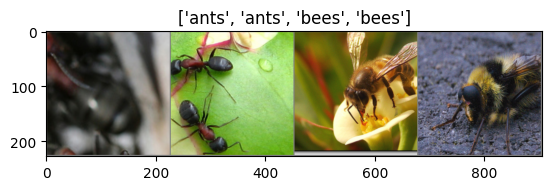

In [90]:
# get batch of training data
# next get [batch_size] image 
image, label = next(iter(dataloaders['train']))
print(image.shape)
print(label.shape)

# make a grid
out = torchvision.utils.make_grid(image)

# show image
imshow(inp= out, title= [class_names[x] for x in label])

In [91]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_accuracy = 0.0 

    # Each epcoh has training and validation phase
    for epoch in range(epochs):
        print(f'Epoch: {epoch + 1}/{epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()   # Set model to training mode
            if phase == 'eval':
                model.eval()    # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0.0 

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward 
                # track history in training loop
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)

                    loss = criterion(preds, label)

                    # backward + optimize if in training phasw
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                
                # statistic 
                running_loss += loss.item() * inputs.size(0)
                running_correct += (preds == labels.data).sum()

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase}, Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}')

            # deep_copy the model 
            if phase == 'val' and epoch_acc > best_accuracy:
                best_accuracy = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60 :.0f}m {time_elapsed % 60:.0f}s')
    print('Best val Acc: {:4f}'.format(best_accuracy))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

## Fine tuning

In [ ]:
# number input fc
# Load a pretrained model and reset final fully connected layer.
model = models.resnet18(pretrained= True)
num_features = model.fc.in_features

In [ ]:
model.fc = nn.Linear(num_features, 2)
model.to(device)

In [ ]:
# loss and optimizer
critetion = nn.CrossEntropyLoss()
optimizer = optim.adam(model.parameters(), lr= 0.01)

In [ ]:
# schedule
# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size= 7, gamma= 0.1)

In [ ]:
# model 
model = train_model(model, criterion, optimizer, step_lr_scheduler, 1)

## Fixed Feature Extractor

In [ ]:
# freeze all the network except final layer
# set require_grad = False to freeze all the params -> gradient not comp

model_conv = torchvision.models.resnet18(pretrained= True)
for param in model_conv.parameters():
    param.requires_grad = False

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model.to(device)    
critetion = nn.CrossEntropyLoss()
optimizer = optim.adam(model.parameters(), lr= 0.01)
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size= 7, gamma= 0.1)
model_conv = train_model(model_conv, criterion, optimizer, step_lr_scheduler, 1)

## Compare

1. Fine-Tuning (Tinh chỉnh):

Fine-tuning là quá trình sử dụng một mô hình đã được huấn luyện trước (thường trên một tập dữ liệu lớn như ImageNet) và huấn luyện lại toàn bộ mô hình (hoặc phần lớn của nó) trên một tập dữ liệu mới nhỏ hơn để giải quyết một nhiệm vụ cụ thể.
Toàn bộ trọng số của mạng đều được cập nhật trong quá trình huấn luyện, giúp mô hình thích nghi với tập dữ liệu mới và tinh chỉnh các trọng số để phù hợp hơn với dữ liệu mục tiêu.
Fine-tuning phù hợp khi tập dữ liệu mới đủ lớn để tránh hiện tượng overfitting và khi nhiệm vụ mới có sự khác biệt đôi chút so với nhiệm vụ ban đầu mà mô hình đã được huấn luyện.
Ví dụ: Fine-tuning một mô hình ResNet đã được huấn luyện trước để phân loại các đối tượng mới trong tập dữ liệu tùy chỉnh.


2. Fixed Feature Extractor (Trích xuất đặc trưng cố định):

Với cách này, một mô hình đã được huấn luyện trước được sử dụng như một bộ trích xuất đặc trưng, nhưng trọng số của các lớp đều được giữ nguyên (không cập nhật trong quá trình huấn luyện).
Chỉ có lớp cuối cùng (thường là các lớp fully connected) được thay thế bằng một lớp mới tương ứng với số lớp mới, và chỉ lớp này được huấn luyện.
Cách này hữu ích khi tập dữ liệu mới nhỏ và việc huấn luyện toàn bộ mô hình có thể dẫn đến hiện tượng overfitting. Các lớp đầu tiên của mô hình huấn luyện trước hoạt động như các bộ trích xuất đặc trưng, trong khi lớp cuối cùng thích nghi với tập dữ liệu mới.
Ví dụ: Sử dụng mô hình ResNet đã huấn luyện trước để trích xuất đặc trưng từ các hình ảnh, sau đó huấn luyện một lớp fully connected mới để phân loại các loại hoa khác nhau.

# 15. Tensorboard